# Daten importieren

In [ ]:
import pandas as pd

df = pd.read_csv("financial_satisfaction_data.csv")
df

,Age Group,Marital Status,Monthly Income (USD),Monthly Expenses (USD),Financial Satisfaction
0,Older Adult,Married,6645.0,3661.0,Satisfied
1,Young Adult,Divorced,5581.0,3087.0,Dissatisfied
2,Young Adult,Divorced,4474.0,4989.0,Dissatisfied
3,Older Adult,Single,9913.0,1382.0,Satisfied
4,Middle Aged,Divorced,2213.0,NaN,Neutral
...,...,...,...,...,...
181,Young Adult,NaN,8489.0,NaN,Satisfied
182,Older Adult,Single,3531.0,3123.0,Satisfied
183,NaN,Single,NaN,2816.0,Neutral
184,Older Adult,Single,5588.0,1043.0,Satisfied


In [ ]:
df.describe()

,Monthly Income (USD),Monthly Expenses (USD)
count,160.000000,168.000000
mean,5847.650000,3248.148810
std,2320.974446,1297.603026
min,2207.000000,1043.000000
25%,3814.250000,2215.750000
50%,5588.000000,3189.500000
75%,7749.000000,4154.000000
max,9958.000000,5984.000000


In [ ]:
df["Monthly Income (USD)"].isnull().sum()

26

In [ ]:
df["Monthly Income (USD)"].isnull().sum() / len(df)

0.13978494623655913

In [ ]:
df["Monthly Expenses (USD)"].isnull().sum() / len(df)

0.0967741935483871

In [ ]:
df["Age Group"].isnull().sum() / len(df)

0.12365591397849462

In [ ]:
df["Marital Status"].isnull().sum() / len(df)

0.15053763440860216

In [ ]:
df["Financial Satisfaction"].isnull().sum() / len(df)

0.0

In [ ]:
df.isnull().sum()

Age Group                 23
Marital Status            28
Monthly Income (USD)      26
Monthly Expenses (USD)    18
Financial Satisfaction     0
dtype: int64

In [ ]:
df.isnull().sum() / len(df)

Age Group                 0.123656
Marital Status            0.150538
Monthly Income (USD)      0.139785
Monthly Expenses (USD)    0.096774
Financial Satisfaction    0.000000
dtype: float64

# Daten aufteilen

In [ ]:
X = df.copy()
y = X.pop("Financial Satisfaction")

In [ ]:
X

,Age Group,Marital Status,Monthly Income (USD),Monthly Expenses (USD)
0,Older Adult,Married,6645.0,3661.0
1,Young Adult,Divorced,5581.0,3087.0
2,Young Adult,Divorced,4474.0,4989.0
3,Older Adult,Single,9913.0,1382.0
4,Middle Aged,Divorced,2213.0,NaN
...,...,...,...,...
181,Young Adult,NaN,8489.0,NaN
182,Older Adult,Single,3531.0,3123.0
183,NaN,Single,NaN,2816.0
184,Older Adult,Single,5588.0,1043.0


In [ ]:
y

0         Satisfied
1      Dissatisfied
2      Dissatisfied
3         Satisfied
4           Neutral
           ...     
181       Satisfied
182       Satisfied
183         Neutral
184       Satisfied
185         Neutral
Name: Financial Satisfaction, Length: 186, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [ ]:
X_train

,Age Group,Marital Status,Monthly Income (USD),Monthly Expenses (USD)
26,Middle Aged,Married,9926.0,1854.0
61,Middle Aged,Single,7523.0,2248.0
181,Young Adult,NaN,8489.0,NaN
5,Middle Aged,Single,3624.0,1173.0
62,Older Adult,NaN,6396.0,1851.0
...,...,...,...,...
168,Middle Aged,Divorced,3599.0,2848.0
9,Young Adult,Divorced,5166.0,5645.0
111,Middle Aged,Single,4265.0,1640.0
166,Middle Aged,Divorced,5793.0,5270.0


# Data Pipelines erstellen

### Age Group

In [ ]:
from sklearn.impute import SimpleImputer

cat_imputer_1 = SimpleImputer(strategy="most_frequent")

imputed_age_train = pd.DataFrame(cat_imputer_1.fit_transform(X_train[["Age Group"]]), columns=["Age Group"], index=X_train.index)
imputed_age_test = pd.DataFrame(cat_imputer_1.transform(X_test[["Age Group"]]), columns=["Age Group"], index=X_test.index)

In [ ]:
imputed_age_train

,Age Group
26,Middle Aged
61,Middle Aged
181,Young Adult
5,Middle Aged
62,Older Adult
...,...
168,Middle Aged
9,Young Adult
111,Middle Aged
166,Middle Aged


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

custom_order = ["Young Adult", "Middle Aged", "Older Adult"]
ordinal_encoder = OrdinalEncoder(categories=[custom_order], handle_unknown="use_encoded_value", unknown_value=-1)

encoded_age_train = pd.DataFrame(ordinal_encoder.fit_transform(imputed_age_train[["Age Group"]]), columns=["Age Group"], index=X_train.index)
encoded_age_test = pd.DataFrame(ordinal_encoder.transform(imputed_age_test[["Age Group"]]), columns=["Age Group"], index=X_test.index)

In [ ]:
encoded_age_train

,Age Group
26,1.0
61,1.0
181,0.0
5,1.0
62,2.0
...,...
168,1.0
9,0.0
111,1.0
166,1.0


In [ ]:
from sklearn.pipeline import Pipeline

age_group_pipeline = Pipeline(steps=[
    ("imputer", cat_imputer_1),
    ("encoder", ordinal_encoder)
])

final_age_train = pd.DataFrame(age_group_pipeline.fit_transform(X_train[["Age Group"]]), columns=["Age Group"], index=X_train.index)
final_age_test = pd.DataFrame(age_group_pipeline.transform(X_test[["Age Group"]]), columns=["Age Group"], index=X_test.index)

In [ ]:
final_age_test

,Age Group
108,2.0
125,2.0
130,1.0
97,0.0
160,2.0
14,0.0
103,2.0
124,0.0
99,2.0
120,2.0


In [ ]:
X_train

,Age Group,Marital Status,Monthly Income (USD),Monthly Expenses (USD)
26,Middle Aged,Married,9926.0,1854.0
61,Middle Aged,Single,7523.0,2248.0
181,Young Adult,NaN,8489.0,NaN
5,Middle Aged,Single,3624.0,1173.0
62,Older Adult,NaN,6396.0,1851.0
...,...,...,...,...
168,Middle Aged,Divorced,3599.0,2848.0
9,Young Adult,Divorced,5166.0,5645.0
111,Middle Aged,Single,4265.0,1640.0
166,Middle Aged,Divorced,5793.0,5270.0


### Marital Status

In [ ]:
cat_imputer_2 = SimpleImputer(strategy="most_frequent")

imputed_marital_status_train = pd.DataFrame(cat_imputer_2.fit_transform(X_train[["Marital Status"]]), columns=["Marital Status"], index=X_train.index)# danach hier auf fit_transform switchen
imputed_marital_status_test = pd.DataFrame(cat_imputer_2.transform(X_test[["Marital Status"]]), columns=["Marital Status"], index=X_test.index)

In [ ]:
imputed_marital_status_train

,Marital Status
26,Married
61,Single
181,Divorced
5,Single
62,Divorced
...,...
168,Divorced
9,Divorced
111,Single
166,Divorced


In [ ]:
from sklearn.preprocessing import OneHotEncoder

oh_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
oh_columns = ["Divorced", "Married", "Single"]

encoded_marital_status_train = pd.DataFrame(oh_encoder.fit_transform(imputed_marital_status_train[["Marital Status"]]), columns=oh_columns, index=X_train.index)
encoded_marital_status_test = pd.DataFrame(oh_encoder.transform(imputed_marital_status_test[["Marital Status"]]), columns=oh_columns, index=X_test.index)

In [ ]:
encoded_marital_status_train

,Divorced,Married,Single
26,0.0,1.0,0.0
61,0.0,0.0,1.0
181,1.0,0.0,0.0
5,0.0,0.0,1.0
62,1.0,0.0,0.0
...,...,...,...
168,1.0,0.0,0.0
9,1.0,0.0,0.0
111,0.0,0.0,1.0
166,1.0,0.0,0.0


In [ ]:
marital_status_pipeline = Pipeline(steps=[
    ("imputer", cat_imputer_2),
    ("encoder", oh_encoder)
])

final_marital_status_train = pd.DataFrame(marital_status_pipeline.fit_transform(X_train[["Marital Status"]]), columns=oh_columns, index=X_train.index)
final_marital_status_test = pd.DataFrame(marital_status_pipeline.transform(X_test[["Marital Status"]]), columns=oh_columns, index=X_test.index)

In [ ]:
final_marital_status_train

,Divorced,Married,Single
26,0.0,1.0,0.0
61,0.0,0.0,1.0
181,1.0,0.0,0.0
5,0.0,0.0,1.0
62,1.0,0.0,0.0
...,...,...,...
168,1.0,0.0,0.0
9,1.0,0.0,0.0
111,0.0,0.0,1.0
166,1.0,0.0,0.0


In [ ]:
X_train

,Age Group,Marital Status,Monthly Income (USD),Monthly Expenses (USD)
26,Middle Aged,Married,9926.0,1854.0
61,Middle Aged,Single,7523.0,2248.0
181,Young Adult,NaN,8489.0,NaN
5,Middle Aged,Single,3624.0,1173.0
62,Older Adult,NaN,6396.0,1851.0
...,...,...,...,...
168,Middle Aged,Divorced,3599.0,2848.0
9,Young Adult,Divorced,5166.0,5645.0
111,Middle Aged,Single,4265.0,1640.0
166,Middle Aged,Divorced,5793.0,5270.0


### Monthly Income und Monthly Expenses

In [ ]:
num_imputer = SimpleImputer(strategy="mean")
num_columns = ["Monthly Income (USD)", "Monthly Expenses (USD)"]

imputed_num_columns_train = pd.DataFrame(num_imputer.fit_transform(X_train[num_columns]), columns=num_columns, index=X_train.index)
imputed_num_columns_test = pd.DataFrame(num_imputer.transform(X_test[num_columns]), columns=num_columns, index=X_test.index)

In [ ]:
imputed_num_columns_train

,Monthly Income (USD),Monthly Expenses (USD)
26,9926.0,1854.000000
61,7523.0,2248.000000
181,8489.0,3140.128788
5,3624.0,1173.000000
62,6396.0,1851.000000
...,...,...
168,3599.0,2848.000000
9,5166.0,5645.000000
111,4265.0,1640.000000
166,5793.0,5270.000000


### Feature Engineering

In [ ]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

class ColumnDivider(BaseEstimator, TransformerMixin):
    def __init__(self, numerator_col_idx, denominator_col_idx):
        self.numerator_col_idx = numerator_col_idx
        self.denominator_col_idx = denominator_col_idx

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = np.array(X)
        new_column = X[:, self.numerator_col_idx] / X[:, self.denominator_col_idx]

        new_column[np.isinf(new_column)] = 10
        new_column[np.isnan(new_column)] = 1

        X = np.column_stack((X, new_column))
        return X

In [ ]:
column_divider = ColumnDivider(numerator_col_idx=0, denominator_col_idx=1)
expanded_num_columns = ["Monthly Income (USD)", "Monthly Expenses (USD)", "Income/Expenses"]

engineered_num_columns_train = pd.DataFrame(column_divider.fit_transform(imputed_num_columns_train[num_columns]), columns=expanded_num_columns, index=X_train.index)
engineered_num_columns_test = pd.DataFrame(column_divider.transform(imputed_num_columns_test[num_columns]), columns=expanded_num_columns, index=X_test.index)

In [ ]:
engineered_num_columns_train

,Monthly Income (USD),Monthly Expenses (USD),Income/Expenses
26,9926.0,1854.000000,5.353830
61,7523.0,2248.000000,3.346530
181,8489.0,3140.128788,2.703392
5,3624.0,1173.000000,3.089514
62,6396.0,1851.000000,3.455429
...,...,...,...
168,3599.0,2848.000000,1.263694
9,5166.0,5645.000000,0.915146
111,4265.0,1640.000000,2.600610
166,5793.0,5270.000000,1.099241


In [ ]:
income_expenses_pipeline = Pipeline(steps=[
    ("imputer", num_imputer),
    ("divider", column_divider)
])

final_num_columns_train = pd.DataFrame(income_expenses_pipeline.fit_transform(X_train[num_columns]), columns=expanded_num_columns, index=X_train.index)
final_num_columns_test = pd.DataFrame(income_expenses_pipeline.transform(X_test[num_columns]), columns=expanded_num_columns, index=X_test.index)

In [ ]:
final_num_columns_train

,Monthly Income (USD),Monthly Expenses (USD),Income/Expenses
26,9926.0,1854.000000,5.353830
61,7523.0,2248.000000,3.346530
181,8489.0,3140.128788,2.703392
5,3624.0,1173.000000,3.089514
62,6396.0,1851.000000,3.455429
...,...,...,...
168,3599.0,2848.000000,1.263694
9,5166.0,5645.000000,0.915146
111,4265.0,1640.000000,2.600610
166,5793.0,5270.000000,1.099241


In [ ]:
X_train

,Age Group,Marital Status,Monthly Income (USD),Monthly Expenses (USD)
26,Middle Aged,Married,9926.0,1854.0
61,Middle Aged,Single,7523.0,2248.0
181,Young Adult,NaN,8489.0,NaN
5,Middle Aged,Single,3624.0,1173.0
62,Older Adult,NaN,6396.0,1851.0
...,...,...,...,...
168,Middle Aged,Divorced,3599.0,2848.0
9,Young Adult,Divorced,5166.0,5645.0
111,Middle Aged,Single,4265.0,1640.0
166,Middle Aged,Divorced,5793.0,5270.0


In [ ]:
X_train_concatenated = pd.concat([final_age_train, final_marital_status_train, final_num_columns_train], axis=1)
X_train_concatenated

,Age Group,Divorced,Married,Single,Monthly Income (USD),Monthly Expenses (USD),Income/Expenses
26,1.0,0.0,1.0,0.0,9926.0,1854.000000,5.353830
61,1.0,0.0,0.0,1.0,7523.0,2248.000000,3.346530
181,0.0,1.0,0.0,0.0,8489.0,3140.128788,2.703392
5,1.0,0.0,0.0,1.0,3624.0,1173.000000,3.089514
62,2.0,1.0,0.0,0.0,6396.0,1851.000000,3.455429
...,...,...,...,...,...,...,...
168,1.0,1.0,0.0,0.0,3599.0,2848.000000,1.263694
9,0.0,1.0,0.0,0.0,5166.0,5645.000000,0.915146
111,1.0,0.0,0.0,1.0,4265.0,1640.000000,2.600610
166,1.0,1.0,0.0,0.0,5793.0,5270.000000,1.099241


In [ ]:
X_test_concatenated = pd.concat([final_age_test, final_marital_status_test, final_num_columns_test], axis=1)
X_test_concatenated

,Age Group,Divorced,Married,Single,Monthly Income (USD),Monthly Expenses (USD),Income/Expenses
108,2.0,0.0,1.0,0.0,8295.000000,3140.128788,2.641611
125,2.0,0.0,0.0,1.0,8242.000000,4628.000000,1.780899
130,1.0,1.0,0.0,0.0,5773.488372,2185.000000,2.642329
97,0.0,1.0,0.0,0.0,5773.488372,2334.000000,2.473645
160,2.0,0.0,1.0,0.0,5773.488372,4314.000000,1.338314
14,0.0,1.0,0.0,0.0,4750.000000,3272.000000,1.451711
103,2.0,0.0,1.0,0.0,6836.000000,4964.000000,1.377115
124,0.0,1.0,0.0,0.0,8247.000000,1930.000000,4.273057
99,2.0,1.0,0.0,0.0,8662.000000,3746.000000,2.312333
120,2.0,0.0,0.0,1.0,5291.000000,1687.000000,3.136337


# ColumnTransformer - Alle Preprocessing Schritte zusammmenführen

In [ ]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ("age_group_column", age_group_pipeline, ["Age Group"]),
        ("marital_status_column", marital_status_pipeline, ["Marital Status"]),
        ("income_expenses_columns", income_expenses_pipeline, ["Monthly Income (USD)", "Monthly Expenses (USD)"])
    ])

final_columns = ["Age Group", "Divorced", "Married", "Single", "Monthly Income (USD)", "Monthly Expenses (USD)", "Income/Expenses"]

X_train_final = pd.DataFrame(preprocessor.fit_transform(X_train), columns=final_columns, index=X_train.index)
X_test_final = pd.DataFrame(preprocessor.transform(X_test), columns=final_columns, index=X_test.index)

In [ ]:
X_train_final

,Age Group,Divorced,Married,Single,Monthly Income (USD),Monthly Expenses (USD),Income/Expenses
26,1.0,0.0,1.0,0.0,9926.0,1854.000000,5.353830
61,1.0,0.0,0.0,1.0,7523.0,2248.000000,3.346530
181,0.0,1.0,0.0,0.0,8489.0,3140.128788,2.703392
5,1.0,0.0,0.0,1.0,3624.0,1173.000000,3.089514
62,2.0,1.0,0.0,0.0,6396.0,1851.000000,3.455429
...,...,...,...,...,...,...,...
168,1.0,1.0,0.0,0.0,3599.0,2848.000000,1.263694
9,0.0,1.0,0.0,0.0,5166.0,5645.000000,0.915146
111,1.0,0.0,0.0,1.0,4265.0,1640.000000,2.600610
166,1.0,1.0,0.0,0.0,5793.0,5270.000000,1.099241


# Modell definieren und finale Pipeline erstellen

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=0)

final_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", model)
])

In [ ]:
final_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('age_group_column',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder(categories=[['Young '
                                                                                               'Adult',
                                                                                               'Middle '
                                                                                               'Aged',
                                                                                               'Older '
                                                                                               'Adult']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Age Group']),
                                                 ('marital_status_column',
                                                  Pipeline(steps=[(...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Marital Status']),
                                                 ('income_expenses_columns',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('divider',
                                                                   ColumnDivider(denominator_col_idx=1,
                                                                                 numerator_col_idx=0))]),
                                                  ['Monthly Income (USD)',
                                                   'Monthly Expenses '
                                                   '(USD)'])])),
                ('model', RandomForestClassifier(random_state=0))])

In [ ]:
final_pipeline.predict(X_test)

array(['Satisfied', 'Neutral', 'Neutral', 'Dissatisfied', 'Satisfied',
       'Dissatisfied', 'Satisfied', 'Satisfied', 'Neutral', 'Satisfied',
       'Satisfied', 'Neutral', 'Satisfied', 'Neutral', 'Neutral',
       'Satisfied', 'Dissatisfied', 'Satisfied', 'Dissatisfied',
       'Satisfied', 'Neutral', 'Dissatisfied', 'Satisfied', 'Satisfied',
       'Neutral', 'Satisfied', 'Satisfied', 'Neutral', 'Neutral',
       'Dissatisfied', 'Satisfied', 'Satisfied', 'Satisfied', 'Satisfied',
       'Satisfied', 'Neutral', 'Neutral', 'Neutral'], dtype=object)

# Hyperparameteroptimierung


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "model__n_estimators": [150, 200, 250],
    "model__max_depth": [3, 4, 5, 6]
}

grid_search = GridSearchCV(final_pipeline, param_grid, cv=4, scoring="accuracy")
grid_search.fit(X_train, y_train)

print("Best Accuracy: ", grid_search.best_score_)
print("Best Parameter: ", grid_search.best_params_)

Best Accuracy:  0.7635135135135136
Best Parameter:  {'model__max_depth': 5, 'model__n_estimators': 200}


# Beste Pipeline und finale Accuracy

In [ ]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('age_group_column',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder(categories=[['Young '
                                                                                               'Adult',
                                                                                               'Middle '
                                                                                               'Aged',
                                                                                               'Older '
                                                                                               'Adult']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Age Group']),
                                                 ('marital_status_column',
                                                  Pipeline(steps=[(...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Marital Status']),
                                                 ('income_expenses_columns',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('divider',
                                                                   ColumnDivider(denominator_col_idx=1,
                                                                                 numerator_col_idx=0))]),
                                                  ['Monthly Income (USD)',
                                                   'Monthly Expenses '
                                                   '(USD)'])])),
                ('model',
                 RandomForestClassifier(max_depth=5, n_estimators=200,
                                        random_state=0))])

In [ ]:
best_pipeline = grid_search.best_estimator_
y_predict = best_pipeline.predict(X_test)
y_predict

array(['Satisfied', 'Neutral', 'Satisfied', 'Dissatisfied', 'Satisfied',
       'Dissatisfied', 'Satisfied', 'Satisfied', 'Satisfied', 'Satisfied',
       'Satisfied', 'Neutral', 'Satisfied', 'Satisfied', 'Neutral',
       'Neutral', 'Dissatisfied', 'Satisfied', 'Dissatisfied',
       'Dissatisfied', 'Neutral', 'Dissatisfied', 'Satisfied',
       'Satisfied', 'Neutral', 'Satisfied', 'Satisfied', 'Neutral',
       'Neutral', 'Dissatisfied', 'Satisfied', 'Satisfied', 'Satisfied',
       'Neutral', 'Satisfied', 'Neutral', 'Neutral', 'Neutral'],
      dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_predict)
print("Final Accuracy:", accuracy)

Final Accuracy: 0.7105263157894737


# Confusion Matrix

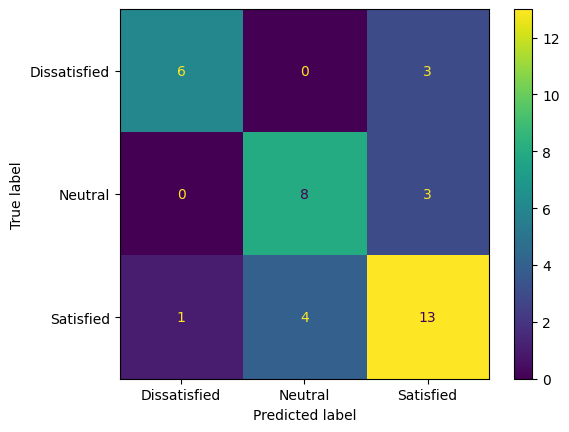

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

In [ ]:
# ColumnDivider